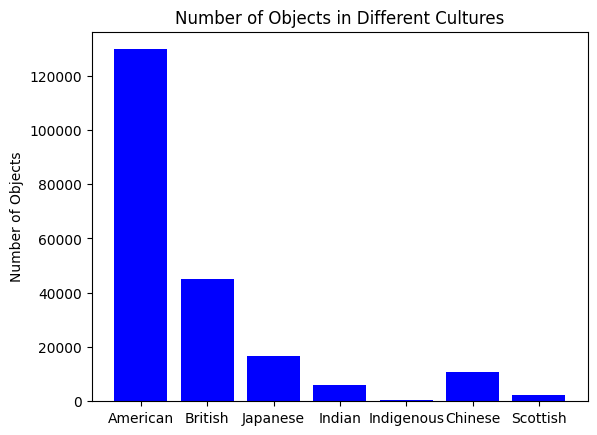

In [6]:
import requests
import matplotlib.pyplot as plt

base_url = 'https://collectionapi.metmuseum.org/public/collection/v1/'

# I defined cultures of interest
cultures_of_interest = ['American', 'British', 'Japanese', 'Indian', 'Indigenous', 'Chinese', 'Scottish']

# Initialized a dictionary to store object counts for each culture
culture_counts = {culture: 0 for culture in cultures_of_interest}

# Loop through each culture and get the count of objects
for culture in cultures_of_interest:
    search_url = f'{base_url}search?q={culture}'
    response = requests.get(search_url)
    data = response.json()
    
    # Update the count for the current culture
    culture_counts[culture] = data['total']

fig, ax = plt.subplots()
ax.bar(culture_counts.keys(), culture_counts.values(), color='blue')
ax.set_ylabel('Number of Objects')
ax.set_title('Number of Objects in Different Cultures')


plt.show()



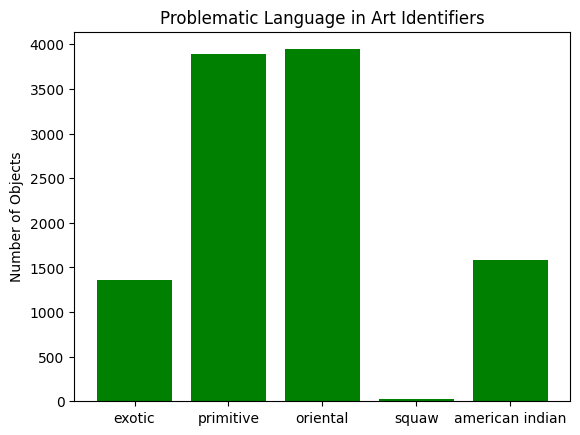

In [3]:
import requests
import matplotlib.pyplot as plt

base_url = 'https://collectionapi.metmuseum.org/public/collection/v1/'

# I define search terms
search_terms = ['exotic', 'primitive', 'oriental', 'squaw', 'american indian']

# Initialize a dictionary to store object counts for each search term
term_counts = {term: 0 for term in search_terms}

# Loop through each search term and get the count of objects
for term in search_terms:
    search_url = f'{base_url}search?q={term}'
    response = requests.get(search_url)
    data = response.json()
    
    # Update the count for the current search term
    term_counts[term] = data['total']

fig, ax = plt.subplots()
ax.bar(term_counts.keys(), term_counts.values(), color='green')
ax.set_ylabel('Number of Objects')
ax.set_title('Problematic Language in Art Identifiers')


plt.show()


/var/folders/86/js348_t97zb0vdq0ps90q5c40000gp/T/ipykernel_95666/2046419959.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


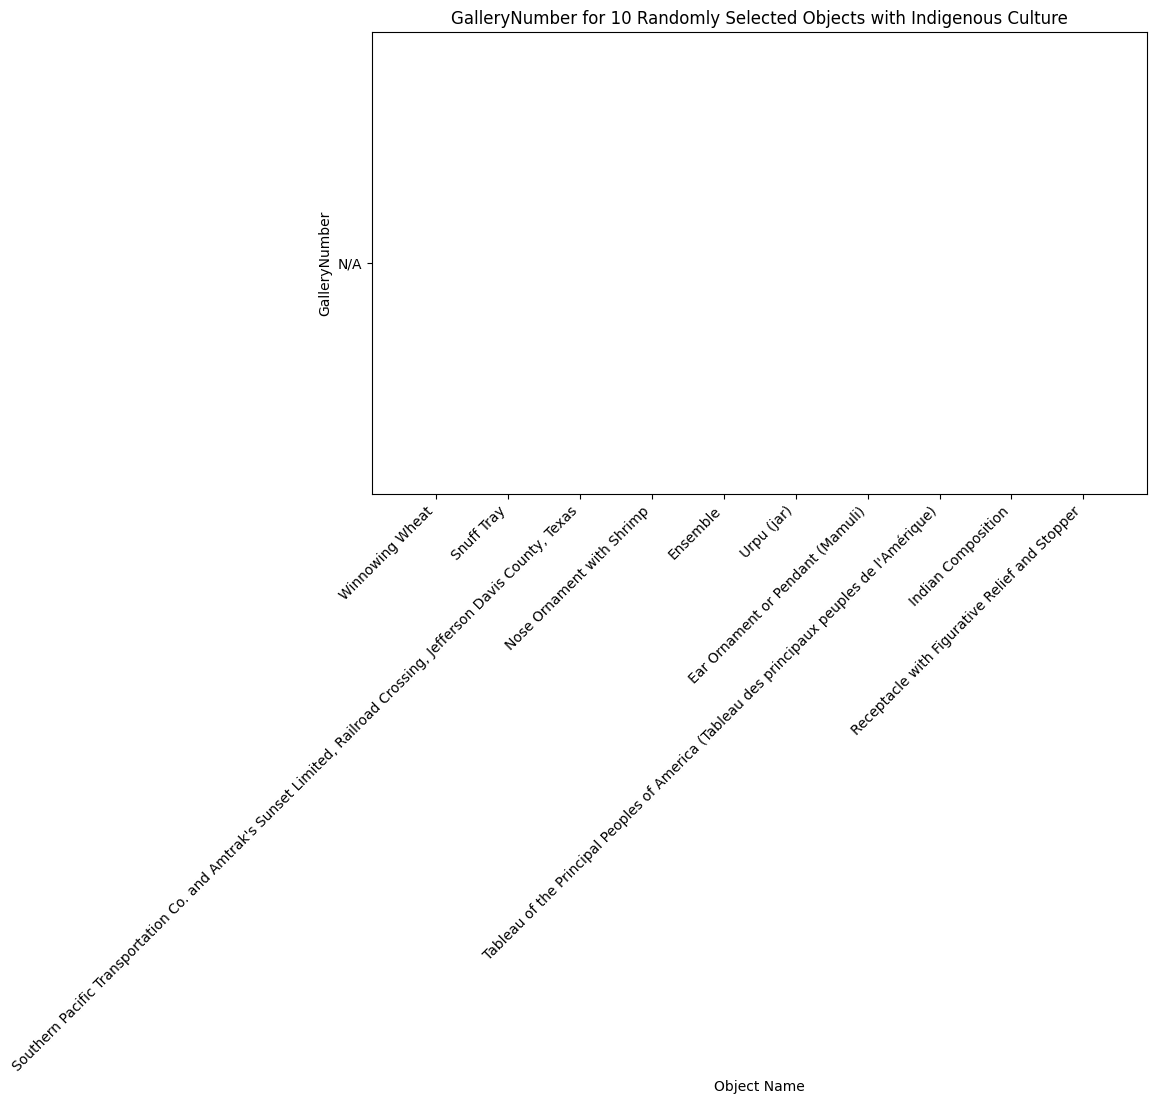

In [4]:
import requests
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

# I define the search term
search_term = 'indigenous'

# Make the API request
search_url = f'https://collectionapi.metmuseum.org/public/collection/v1/search?q={search_term}'
response = requests.get(search_url)
data = response.json()

# Extract object IDs from the search results
object_ids = data['objectIDs']

# Randomly select 10 object IDs
random_object_ids = random.sample(object_ids, 10)

# Initialize lists to store data
gallery_numbers = []
object_names = []

# Loop through each randomly selected object ID to get detailed information
for object_id in random_object_ids:
    object_url = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{object_id}'
    object_response = requests.get(object_url)
    object_data = object_response.json()

    # Extract GalleryNumber and Object Name
    gallery_number = object_data.get('galleryNumber', 'N/A')
    object_name = object_data.get('title', 'N/A')

    gallery_numbers.append(gallery_number)
    object_names.append(object_name)

    
    time.sleep(1)

df = pd.DataFrame({'Object Name': object_names, 'GalleryNumber': gallery_numbers})


plt.figure(figsize=(10, 6))
plt.bar(df['Object Name'], df['GalleryNumber'])
plt.xlabel('Object Name')
plt.ylabel('GalleryNumber')
plt.title('GalleryNumber for 10 Randomly Selected Objects with Indigenous Culture')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
